In [149]:
import pandas as pd

import matplotlib.pyplot as plt

In [150]:
housing_data = pd.read_csv('datasets/housing.csv') #read the csv file

In [151]:
housing_data.shape

(20640, 10)

In [152]:
housing_data.sample(5) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18629,-121.90,37.10,23.0,1708.0,287.0,670.0,238.0,6.4517,356600.0,<1H OCEAN
4592,-118.27,34.05,25.0,1316.0,836.0,2796.0,784.0,1.7866,325000.0,<1H OCEAN
9153,-118.53,34.44,19.0,1285.0,195.0,650.0,193.0,6.0398,217800.0,<1H OCEAN
5912,-118.44,34.29,32.0,1260.0,382.0,1434.0,342.0,2.0286,122900.0,<1H OCEAN
4722,-118.37,34.05,48.0,1266.0,234.0,539.0,222.0,4.0050,275000.0,<1H OCEAN


In [153]:
housing_data = housing_data.dropna() #clean the missing values

In [154]:
housing_data.shape

(20433, 10)

In [155]:
housing_data.loc[housing_data['median_house_value'] >= 500001].count() #how many houses have median housing value of 500001?

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [156]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] >= 500001].index)

In [157]:
housing_data.shape

(19475, 10)

In [158]:
housing_data.head() #view the first few records of this dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [159]:
housing_data['ocean_proximity'].unique() #contains categories or discrete values(not numbers)

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [160]:
#to convert categorical values into numeric values, we use One-Hot Encoding

housing_data = pd.get_dummies(housing_data, columns = ['ocean_proximity'])

In [161]:
housing_data.shape #after one-hot encoding

(19475, 14)

In [162]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [163]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3588,-118.54,34.23,29.0,1753.0,342.0,1318.0,333.0,4.1250,241400.0,1,0,0,0,0
16428,-121.32,38.16,14.0,2049.0,398.0,1071.0,369.0,3.5000,240800.0,0,1,0,0,0
979,-121.87,37.67,10.0,4337.0,800.0,1813.0,743.0,5.5000,247200.0,0,1,0,0,0
17458,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,0,0,0,0,1
15445,-117.25,33.19,18.0,1891.0,306.0,830.0,279.0,4.5764,207000.0,1,0,0,0,0


In [164]:
X = housing_data.drop('median_house_value', axis = 1) #drop only median_house_value from column
Y = housing_data['median_house_value'] #what we want to predict using ML algo to use in the training.

In [165]:
X.columns #gives names of the features that we used to train our model

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [166]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#x_train will contain the training data and y_train will contain the corresponding targets

In [167]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [168]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [169]:
#train the linear model to predict price
from sklearn.linear_model import LinearRegression 

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [170]:
print('Training Score: ', linear_model.score(x_train, y_train)) #training score in terms of r-square for LR model.

Training Score:  0.6166090420041512


In [171]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [172]:
#formula to represent a linear model (y=wx+c where, x is the feature)
coef = pd.Series(linear_model.coef_, predictors).sort_values()

#linear model will calculate the coefficient for each input feature in our dataset.

print(coef) #measures how much particular feature conrtibutes towards the prediction.
#negative coef indicate the features tend to lower the price
#positive coef indicate the features tend to increase the price

ocean_proximity_INLAND        -25677.126400
longitude                     -23963.108914
latitude                      -22243.337958
population                       -33.899445
total_rooms                       -7.276528
households                        51.399274
total_bedrooms                    93.584324
housing_median_age               950.105049
ocean_proximity_NEAR BAY        6286.609602
ocean_proximity_<1H OCEAN      13155.683248
ocean_proximity_NEAR OCEAN     16967.998879
median_income                  38711.622289
ocean_proximity_ISLAND        167004.070994
dtype: float64


In [ ]:
#now we have fully trained linear model. It's time to predict.

In [176]:
y_pred = linear_model.predict(x_test)

In [177]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test}) #get predicted and actual value

df_pred_actual.head(10)

,predicted,actual
10228,185013.854986,168000.0
17449,305162.904269,223100.0
10175,198179.059287,161700.0
7147,227082.602788,201100.0
17391,219453.936228,112500.0
10779,152290.423108,276800.0
7107,237311.733363,203400.0
13722,49385.303353,85100.0
9000,237385.672235,296800.0
17028,213228.805604,256300.0


In [178]:
from sklearn.metrics import r2_score #using r2_score function as we are modelling LR
#eyeballing is good, but the best way to evaluate a model is to calculate r2_score on your test data

print('Testing Score: ', r2_score(y_test, y_pred))

Testing Score:  0.5961202241562353


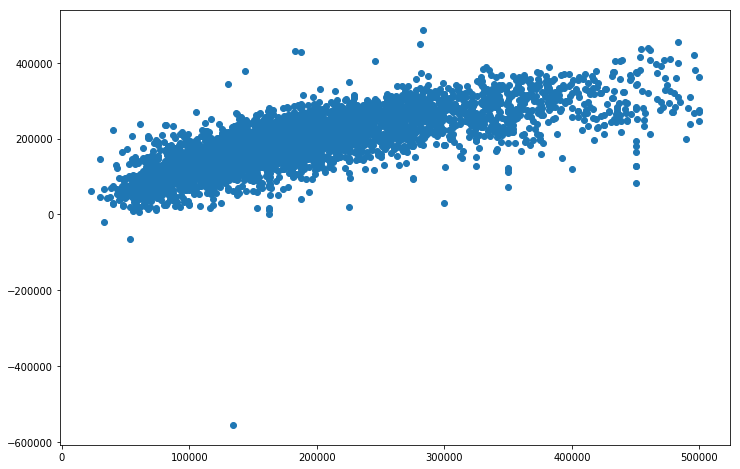

In [179]:
fig, ax = plt.subplots(figsize=(12, 8)) #visualize actual price values with predicted values

plt.scatter(y_test, y_pred)
plt.show()

In [180]:
df_pred_actual_sample = df_pred_actual.sample(100) #get 100 samples of actual vs predicted value from the original dataframe

df_pred_actual_sample = df_pred_actual_sample.reset_index() #set the index --> O

In [182]:
df_pred_actual_sample.head()

,index,predicted,actual
0,12504,174719.959204,131900.0
1,18670,278781.190777,289500.0
2,2120,130688.435238,67900.0
3,4870,159144.607517,164600.0
4,5819,185621.233547,255900.0


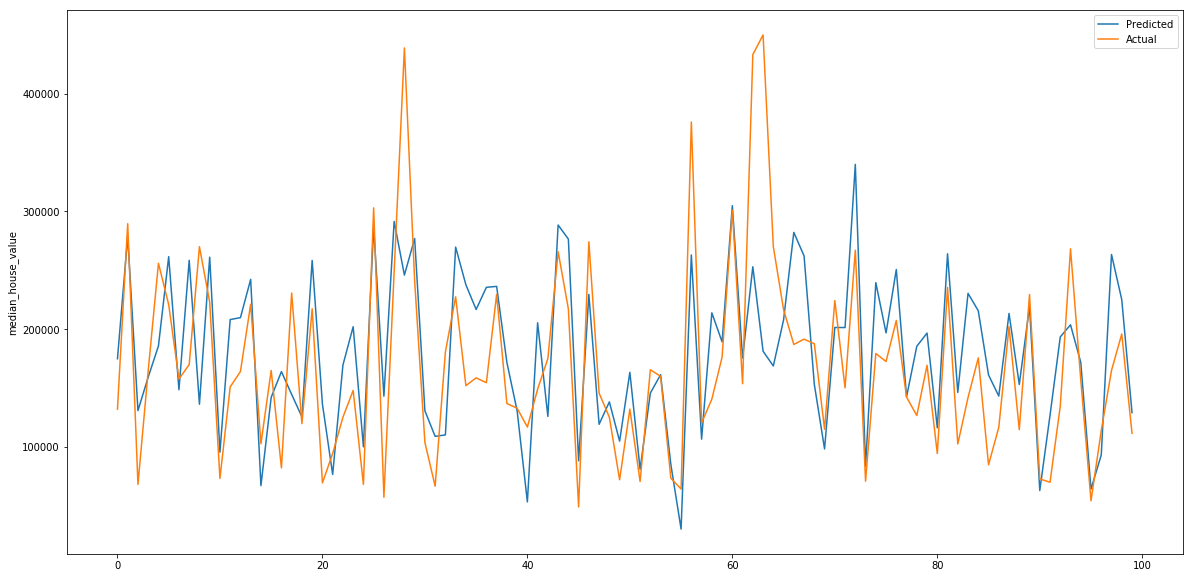

In [183]:
plt.figure(figsize = (20,10)) #pyplot

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()